In [1]:
from bs4 import BeautifulSoup

from urllib.request import urlopen

page = urlopen('https://music.bugs.co.kr/chart/track/day/total') # 벅스 노래 차트 페이지 가져옴

soup = BeautifulSoup(page, 'html.parser')

#print(soup.prettify())

In [2]:
daily_songs = soup.find(class_ = 'list trackList byChart').tbody.find_all('tr') # 노래 목록 저장
#daily_songs

In [3]:
import re

bugs_daily=[]

for d_song in daily_songs: # 각 노래 정보 가져오기
    rank = int(d_song.find('strong').get_text())
    updown = d_song.find('p', class_='change').get_text()
    title = d_song.find('th', scope='row').get_text().strip()
    singer = ' '.join(list(set(re.split('\r\n|\n',d_song.find('p', class_='artist').get_text().strip())))).strip()
    album = d_song.find('a', class_='album').get_text()
    
    if '없음' in updown:
        updown = updown.replace("변동없음","")
    elif '상승'in updown:
        updown = updown.replace("계단 상승", "")
    elif '하락' in updown:
        updown = updown.replace("계단 하락", "")
    else:
        updown = 0
       
    
    #앨범 발매일
    album_page = d_song.find('a')['href']
    page_open= urlopen(album_page)
    album_pg = BeautifulSoup(page_open, 'html.parser')
    #dates = album_pg.find(class_='info').tbody.find_all('tr')[2]

    r_date = album_pg.find('tbody').find('time').text
    
    bugs_daily.append([rank, int(updown), title, singer, album, r_date])
        
    print('순위 :', rank)
    print('등락 :', updown)
    print('곡 :', title)
    print('가수 :', singer)
    print('앨범 :', album)
    print('발매일 :', r_date)
    print()

순위 : 1
등락 : 0
곡 : 꽃 길
가수 : BIGBANG
앨범 : 꽃 길
발매일 : 2018.03.13

순위 : 2
등락 :  2 
곡 : 별이 빛나는 밤
가수 : 마마무(Mamamoo)
앨범 : Yellow Flower
발매일 : 2018.03.07

순위 : 3
등락 : 0
곡 : Jenga (Feat. Gaeko)
가수 : 헤이즈(HEIZE)
앨범 : 바람
발매일 : 2018.03.08

순위 : 4
등락 : 0
곡 : 나타나줘 (Feat. 박재범)
가수 : 로꼬
앨범 : 나타나줘
발매일 : 2018.03.14

순위 : 5
등락 :  3 
곡 : My Blossom
가수 : 소유 (SOYOU)
앨범 : My Blossom
발매일 : 2018.03.12

순위 : 6
등락 :  1 
곡 : 내가 더 나빠
가수 : 헤이즈(HEIZE)
앨범 : 바람
발매일 : 2018.03.08

순위 : 7
등락 : 0
곡 : 사랑을 했다 (LOVE SCENARIO)
가수 : iKON
앨범 : Return
발매일 : 2018.01.25

순위 : 8
등락 : 0
곡 : BOSS
가수 : NCT U
앨범 : NCT 2018 EMPATHY
발매일 : 2018.03.14

순위 : 9
등락 :  3 
곡 : You
가수 : 멜로망스(MeloMance)
앨범 : 투유 프로젝트 - 슈가맨2 Part.2
발매일 : 2018.01.22

순위 : 10
등락 :  2 
곡 : 그때 헤어지면 돼
가수 : 로이킴
앨범 : 그때 헤어지면 돼
발매일 : 2018.02.12

순위 : 11
등락 : 0
곡 : 그날처럼
가수 : 장덕철
앨범 : 그날처럼
발매일 : 2017.11.28

순위 : 12
등락 :  2 
곡 : 뿜뿜
가수 : 모모랜드(MOMOLAND)
앨범 : GREAT!
발매일 : 2018.01.03

순위 : 13
등락 :  4 
곡 : 괜찮냐고
가수 : 헤이즈(HEIZE)
앨범 : 바람
발매일 : 2018.03.08

순위 : 14
등락 :  1 
곡 : Bad Boy
가수

순위 : 99
등락 :  7 
곡 : Perhaps Love (사랑인가요) (Prod.By 박근태)
가수 : 에릭남(Eric Nam)
앨범 : Your BGM Vol.1
발매일 : 2017.09.29

순위 : 100
등락 : 0
곡 : 에너제틱 (Energetic)
가수 : Wanna One(워너원)
앨범 : 1X1=1(TO BE ONE)
발매일 : 2017.08.07



In [4]:
#bugs_daily

In [5]:
import pandas as pd

#노래 정보 데이터 프레임 만들기
song_frame = pd.DataFrame(bugs_daily, columns=['순위','등락','bugs_제목','bugs_가수','bugs_앨범','bugs_발매일'])
song_frame.head()

,순위,등락,bugs_제목,bugs_가수,bugs_앨범,bugs_발매일
0,1,0,꽃 길,BIGBANG,꽃 길,2018.03.13
1,2,2,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
2,3,0,Jenga (Feat. Gaeko),헤이즈(HEIZE),바람,2018.03.08
3,4,0,나타나줘 (Feat. 박재범),로꼬,나타나줘,2018.03.14
4,5,3,My Blossom,소유 (SOYOU),My Blossom,2018.03.12


In [6]:
mv_page = urlopen('https://music.bugs.co.kr/chart/mv/day/total') # 비디오 순위 정보 페이지

mv_soup = BeautifulSoup(mv_page, 'html.parser')

#print(mv_soup.prettify())

In [7]:
daily_mvs = mv_soup.find('ul', class_='list tileView mvList ').find_all('li', class_='divider') #동영상 차트 목록 저장
# daily_mvs = mv_soup.find('ul', {'class':['list','tileView','mvList']})
#daily_mvs

In [8]:
bugs_dailymv=[]
cnt = 0

for d_mv in daily_mvs: # 각 동영상 정보 저장
    singer =  ' '.join(list(set(re.split('\r\n|\n',d_mv.find('p', class_='artist').get_text().strip())))).strip()
    #d_mv.find('p', class_='artist').get_text().strip()
    title = d_mv.find('p', class_='trackTitle').find('a').text
    w_grade = d_mv.find(class_='badge').get_text()
    cnt = cnt+1
    
    bugs_dailymv.append([ cnt  ,singer, title, w_grade])
    
    
    
    print('mv_랭킹 :', cnt)
    print('mv_가수 :', singer)
    print('mv_곡 :', title)
    print('mv_시청등급 :', w_grade)
    print()

mv_랭킹 : 1
mv_가수 : 모모랜드(MOMOLAND)
mv_곡 : 뿜뿜
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 2
mv_가수 : 마마무(Mamamoo)
mv_곡 : 별이 빛나는 밤
mv_시청등급 : [15세 이상 관람가]

mv_랭킹 : 3
mv_가수 : Red Velvet (레드벨벳)
mv_곡 : Bad Boy
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 4
mv_가수 : NCT 127
mv_곡 : TOUCH
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 5
mv_가수 : Wanna One(워너원)
mv_곡 : 약속해요 (I.P.U.)
mv_시청등급 : [전체 관람가]

mv_랭킹 : 6
mv_가수 : NCT U
mv_곡 : BOSS
mv_시청등급 : [15세 이상 관람가]

mv_랭킹 : 7
mv_가수 : TWICE (트와이스)
mv_곡 : Heart Shaker
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 8
mv_가수 : 헤이즈(HEIZE)
mv_곡 : jenga (Feat. Gaeko)
mv_시청등급 : [15세 이상 관람가]

mv_랭킹 : 9
mv_가수 : iKON
mv_곡 : 사랑을했다 (LOVE SCENARIO)
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 10
mv_가수 : TWICE (트와이스)
mv_곡 : LIKEY
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 11
mv_가수 : 셀럽파이브
mv_곡 : 셀럽파이브(셀럽이 되고 싶어)
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 12
mv_가수 : 청하
mv_곡 : Roller Coaster
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 13
mv_가수 : 선미
mv_곡 : 주인공
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 14
mv_가수 : 에이프릴(APRIL)
mv_곡 : 파랑새
mv_시청등급 : [12세 이상 관람가]

mv_랭킹 : 15
mv_가수 : NCT U
m

In [9]:
bugs_dailymv[0:10]

[[1, '모모랜드(MOMOLAND)', '뿜뿜', '[12세 이상 관람가]'],
 [2, '마마무(Mamamoo)', '별이 빛나는 밤', '[15세 이상 관람가]'],
 [3, 'Red Velvet (레드벨벳)', 'Bad Boy', '[12세 이상 관람가]'],
 [4, 'NCT 127', 'TOUCH', '[12세 이상 관람가]'],
 [5, 'Wanna One(워너원)', '약속해요 (I.P.U.)', '[전체 관람가]'],
 [6, 'NCT U', 'BOSS', '[15세 이상 관람가]'],
 [7, 'TWICE (트와이스)', 'Heart Shaker', '[12세 이상 관람가]'],
 [8, '헤이즈(HEIZE)', 'jenga (Feat. Gaeko)', '[15세 이상 관람가]'],
 [9, 'iKON', '사랑을했다 (LOVE SCENARIO)', '[12세 이상 관람가]'],
 [10, 'TWICE (트와이스)', 'LIKEY', '[12세 이상 관람가]']]

In [10]:
import pandas as pd

# 동영상 정보 데이터 프레임화 시키기
mv_frame = pd.DataFrame(bugs_dailymv, columns=['bugs_mv_순위','bugs_아티스트','bugs_제목','bugs_시청등급'])
mv_frame.head()

,bugs_mv_순위,bugs_아티스트,bugs_제목,bugs_시청등급
0,1,모모랜드(MOMOLAND),뿜뿜,[12세 이상 관람가]
1,2,마마무(Mamamoo),별이 빛나는 밤,[15세 이상 관람가]
2,3,Red Velvet (레드벨벳),Bad Boy,[12세 이상 관람가]
3,4,NCT 127,TOUCH,[12세 이상 관람가]
4,5,Wanna One(워너원),약속해요 (I.P.U.),[전체 관람가]


In [11]:
# 노래 제목을 기준으로 요일 Top 100 차트와 동영상 Top 100 차트를 합친다.
bugs = pd.merge(song_frame, mv_frame, on='bugs_제목')
bugs

,순위,등락,bugs_제목,bugs_가수,bugs_앨범,bugs_발매일,bugs_mv_순위,bugs_아티스트,bugs_시청등급
0,2,2,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07,2,마마무(Mamamoo),[15세 이상 관람가]
1,6,1,내가 더 나빠,헤이즈(HEIZE),바람,2018.03.08,17,헤이즈(HEIZE),[12세 이상 관람가]
2,8,0,BOSS,NCT U,NCT 2018 EMPATHY,2018.03.14,6,NCT U,[15세 이상 관람가]
3,10,2,그때 헤어지면 돼,로이킴,그때 헤어지면 돼,2018.02.12,41,로이킴,[전체 관람가]
4,11,0,그날처럼,장덕철,그날처럼,2017.11.28,42,장덕철,[12세 이상 관람가]
5,12,2,뿜뿜,모모랜드(MOMOLAND),GREAT!,2018.01.03,1,모모랜드(MOMOLAND),[12세 이상 관람가]
6,14,1,Bad Boy,Red Velvet (레드벨벳),The Perfect Red Velvet - The 2nd Album Repackage,2018.01.29,3,Red Velvet (레드벨벳),[12세 이상 관람가]
7,16,2,Roller Coaster,청하,Offset,2018.01.17,12,청하,[12세 이상 관람가]
8,17,2,선물,멜로망스(MeloMance),Moonlight,2017.07.10,61,멜로망스(MeloMance),[15세 이상 관람가]
9,20,0,TOUCH,NCT 127,NCT 2018 EMPATHY,2018.03.14,4,NCT 127,[12세 이상 관람가]


In [12]:
import numpy as np
import platform

from matplotlib import font_manager,rc
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

else:
    print('Unknown System... Sorry~~')

In [13]:
np.corrcoef(bugs['순위'], bugs['bugs_mv_순위'])
#노래 차트 순위와 동영상 차트 순위의 상관관계 구하기

array([[1.       , 0.3452541],
       [0.3452541, 1.       ]])

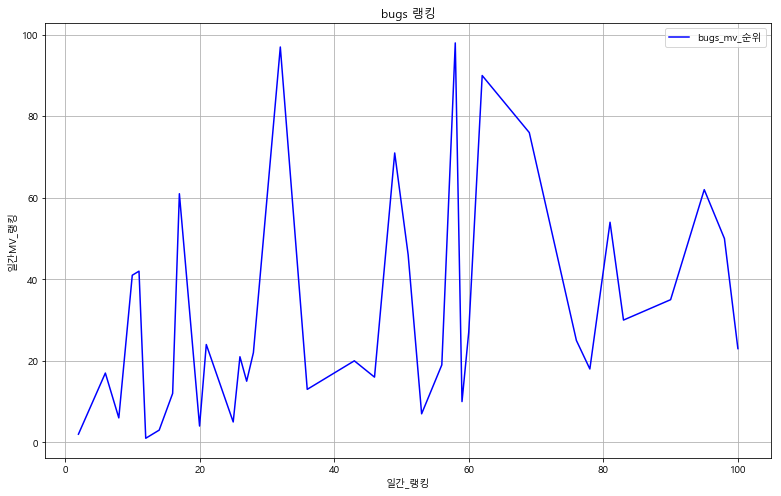

In [14]:
plt.figure(figsize=(13,8))
plt.plot(bugs['순위'], bugs['bugs_mv_순위'], color='blue', markersize=12)
plt.grid()
plt.legend(loc='best')
plt.xlabel('일간_랭킹')
plt.ylabel('일간MV_랭킹')
plt.title('bugs 랭킹')
plt.show()

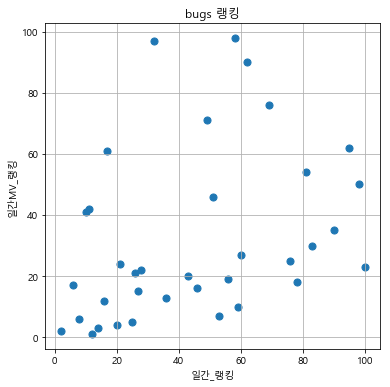

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(bugs['순위'], bugs['bugs_mv_순위'], s=50) 
plt.xlabel('일간_랭킹')
plt.ylabel('일간MV_랭킹')
plt.title('bugs 랭킹')
plt.grid() 
plt.show()

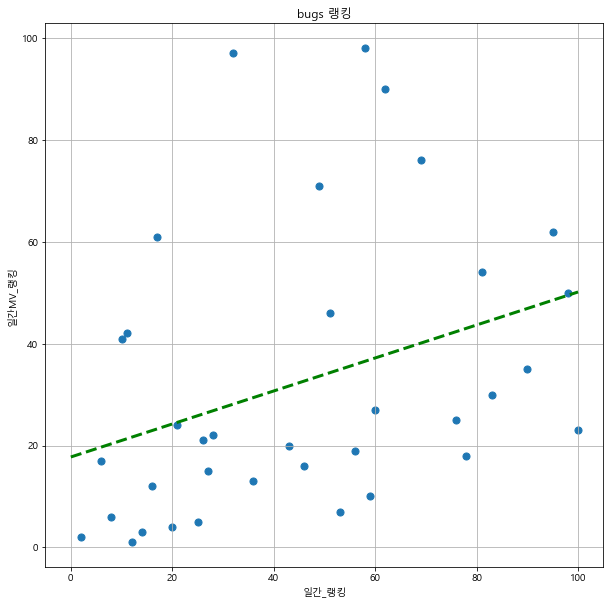

In [16]:
r_fp =np.polyfit(bugs['순위'], bugs['bugs_mv_순위'],1) 
r_fp  #기준에 대한 선

f1 = np.poly1d(r_fp)
fx = np.linspace(0,100,100) 
plt.figure(figsize=(10,10)) 
plt.scatter(bugs['순위'], bugs['bugs_mv_순위'], s=50) 
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # 기준 직선 그려주기 
plt.xlabel('일간_랭킹')
plt.ylabel('일간MV_랭킹')
plt.title('bugs 랭킹')
plt.grid() 
plt.show()


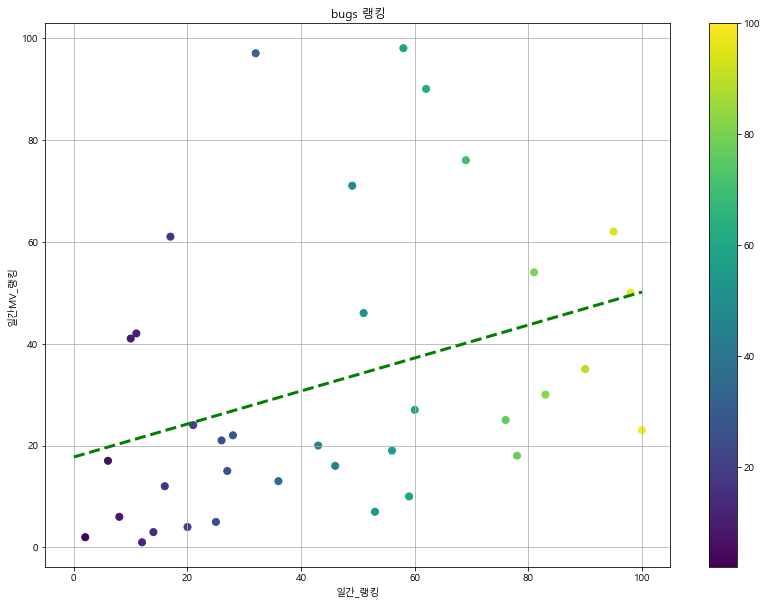

In [17]:
plt.figure(figsize=(14,10))
plt.scatter(bugs['순위'], bugs['bugs_mv_순위'],c=bugs['순위'], s=50) 
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') 
#오차가 가장 큰 10개의 구에 대해서 텍스트 부여하기 
# for n in range(10):     
#     plt.text(bugs['순위'][n]*1.02,  bugs['bugs_mv_순위'][n] * 0.98, bugs.index[n], fontsize=15)  

plt.xlabel('일간_랭킹') 
plt.ylabel('일간MV_랭킹')
plt.title('bugs 랭킹')
plt.colorbar() 
plt.grid()
plt.show()